# EDA of CPJ Data on Journalists Killed since 1992

In [1]:
# %load ~/jupyter_imports.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# make plots look nice
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3


In [2]:
cpj = pd.read_csv('../data/Journalists Killed between 1992 and 2020.csv')
cpj.head()

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2006,Confirmed,Ahmad [full name unavailable],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Confirmed,Khaled Mohammad Nofan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,Confirmed,Sabah Salman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,Confirmed,Unidentified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,Confirmed,Abadullah Hananzai,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2033 non-null   int64  
 1   combinedStatus            2033 non-null   object 
 2   fullName                  2033 non-null   object 
 3   sortName                  0 non-null      float64
 4   primaryNationality        1313 non-null   object 
 5   secondaryNationality      4 non-null      object 
 6   tertiaryNationality       0 non-null      float64
 7   gender                    1459 non-null   object 
 8   photoUrl                  431 non-null    object 
 9   photoCredit               267 non-null    object 
 10  type                      2033 non-null   object 
 11  lastStatus                231 non-null    object 
 12  typeOfDeath               1369 non-null   object 
 13  status                    2033 non-null   object 
 14  employed

In [4]:
# drop columns with all nulls
cpj.dropna(axis=1, how='all', inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      2033 non-null   int64 
 1   combinedStatus            2033 non-null   object
 2   fullName                  2033 non-null   object
 3   primaryNationality        1313 non-null   object
 4   secondaryNationality      4 non-null      object
 5   gender                    1459 non-null   object
 6   photoUrl                  431 non-null    object
 7   photoCredit               267 non-null    object
 8   type                      2033 non-null   object
 9   lastStatus                231 non-null    object
 10  typeOfDeath               1369 non-null   object
 11  status                    2033 non-null   object
 12  employedAs                2025 non-null   object
 13  organizations             2032 non-null   object
 14  jobs                    

What is difference between 'combinedStatus','status', and 'lastStatus?

In [5]:
cpj['combinedStatus'].value_counts()

Confirmed      1473
Unconfirmed     550
Killed           10
Name: combinedStatus, dtype: int64

In [6]:
cpj['status'].value_counts()

Killed    2033
Name: status, dtype: int64

In [7]:
cpj['lastStatus'].value_counts()

Killed    231
Name: lastStatus, dtype: int64

Status and lastStatus don't seem to contain any useful information, so drop those columns.

In [8]:
cpj.drop(['status','lastStatus'],axis=1,inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      2033 non-null   int64 
 1   combinedStatus            2033 non-null   object
 2   fullName                  2033 non-null   object
 3   primaryNationality        1313 non-null   object
 4   secondaryNationality      4 non-null      object
 5   gender                    1459 non-null   object
 6   photoUrl                  431 non-null    object
 7   photoCredit               267 non-null    object
 8   type                      2033 non-null   object
 9   typeOfDeath               1369 non-null   object
 10  employedAs                2025 non-null   object
 11  organizations             2032 non-null   object
 12  jobs                      1398 non-null   object
 13  coverage                  1348 non-null   object
 14  mediums                 

Comparing combinedStatus wiht motiveConfirmed...

In [9]:
cpj['combinedStatus'].value_counts()

Confirmed      1473
Unconfirmed     550
Killed           10
Name: combinedStatus, dtype: int64

In [10]:
cpj['motiveConfirmed'].value_counts()

Confirmed      1369
Unconfirmed     550
Name: motiveConfirmed, dtype: int64

In [11]:
cpj.head()

,year,combinedStatus,fullName,primaryNationality,secondaryNationality,gender,photoUrl,photoCredit,type,typeOfDeath,...,province,localOrForeign,sourcesOfFire,motiveConfirmed,accountabilityCrossfire,accountabilityAssignment,impunityMurder,tortured,captive,threatened
0,2006,Confirmed,Ahmad [full name unavailable],NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Confirmed,Khaled Mohammad Nofan,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,Confirmed,Sabah Salman,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,Confirmed,Unidentified,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,Confirmed,Abadullah Hananzai,Afghanistan,NaN,Male,NaN,NaN,Journalist,Murder,...,NaN,Local,Political Group,Confirmed,NaN,NaN,Complete Impunity,No,No,No


In [12]:
## Might want to limit analysis to only confirmed motives??

Don't need photoUrl or photoCredit columns

In [13]:
cpj.drop(['photoUrl','photoCredit'],axis=1,inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      2033 non-null   int64 
 1   combinedStatus            2033 non-null   object
 2   fullName                  2033 non-null   object
 3   primaryNationality        1313 non-null   object
 4   secondaryNationality      4 non-null      object
 5   gender                    1459 non-null   object
 6   type                      2033 non-null   object
 7   typeOfDeath               1369 non-null   object
 8   employedAs                2025 non-null   object
 9   organizations             2032 non-null   object
 10  jobs                      1398 non-null   object
 11  coverage                  1348 non-null   object
 12  mediums                   1395 non-null   object
 13  country                   2033 non-null   object
 14  location                

Note we only have gender info for 1459 out of 2033 rows.

In [14]:
cpj['gender'].value_counts()

Male      1357
Female     102
Name: gender, dtype: int64

In [15]:
cpj['primaryNationality'].value_counts()

Iraq                 166
Syria                124
Philippines           88
Mexico                64
Pakistan              63
                    ... 
UK                     1
Netherlands            1
Republic of Congo      1
Saudi Arabia           1
Turkmenistan           1
Name: primaryNationality, Length: 102, dtype: int64

## What does the 'type' field represent?


In [16]:
cpj['type'].value_counts()

Journalist      1919
Media Worker     114
Name: type, dtype: int64

In [17]:
cpj['employedAs'].value_counts()

Staff        1706
Freelance     319
Name: employedAs, dtype: int64

In [18]:
cpj['organizations'].value_counts()

Freelance                            115
freelance                             73
Freelancer                            31
Al-Arabiya                            15
Reuters                               14
                                    ... 
National Iraqi News Agency             1
Ausaf and Mashriq                      1
Rastriya Swabhiman                     1
Liberté FM                             1
Antena 102.5 FM and Antena 760 AM      1
Name: organizations, Length: 1378, dtype: int64

In [19]:
cpj['jobs'].value_counts()

Print Reporter                                  278
Broadcast Reporter                              258
Camera Operator                                 155
Editor                                          127
Photographer                                     94
                                               ... 
Internet Reporter,Producer                        1
Columnist/Commentator,Editor,Producer             1
Camera Operator,Photographer,Publisher/Owner      1
Internet Reporter,Columnist/Commentator           1
Internet Reporter,Publisher/Owner                 1
Name: jobs, Length: 88, dtype: int64

In [49]:
cpj['coverage'].value_counts().to_frame().head(20)

,coverage
War,298
Politics,194
"Politics,War",105
Crime,62
"Human Rights,Politics,War",60
Corruption,59
"Corruption,Crime",56
"Corruption,Politics",49
"Human Rights,War",47
"Human Rights,Politics",42


Some entries have multiple 'coverage' categories listed; need to separate these to get counts for each individual category.

In [116]:
# get the unique values for category
col_name = 'coverage'

def get_unique_category_vals(df, col_name):
    '''
    Find unique category values for specified column in a dataframe, where some rows 
    contain multiple categories separated by commas.
    '''
    unique_entries = list(cpj[col_name].unique())
    unique_entries = list(map(str,unique_entries))
    unique_entries_split = list(map(lambda x: x.split(','),unique_entries))
    unique_vals = set([val for sublist in unique_entries_split for val in sublist])
    return(unique_vals)

uvals = get_unique_category_vals(cpj,'coverage')
print(uvals)


def add_category_counts_to_df(df, col_name):
    '''
    '''
    
    unique_vals = get_unique_category_vals(df, col_name)
    
    for val in unique_vals:
        df[col_name + '_' + val] = df[col_name].apply(str).apply(lambda x: val in x)
    return df

df = cpj.copy()
df=add_category_counts_to_df(df,'coverage')

df.loc[:,['year','coverage','coverage_War','coverage_Crime']].head()



{'Sports', 'Business', 'Corruption', 'Politics', 'Crime', 'War', 'Human Rights', 'nan', 'Culture'}


,year,coverage,coverage_War,coverage_Crime
0,2006,NaN,False,False
1,2007,NaN,False,False
2,2007,NaN,False,False
3,2005,NaN,False,False
4,2018,"Crime,Politics,War",True,True


In [122]:
df.filter(regex='^coverage',axis=1).sum()


coverage_Sports           41
coverage_Business         71
coverage_Corruption      290
coverage_Politics        666
coverage_Crime           237
coverage_War             581
coverage_Human Rights    297
coverage_nan             685
coverage_Culture         164
dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      2033 non-null   int64 
 1   combinedStatus            2033 non-null   object
 2   fullName                  2033 non-null   object
 3   primaryNationality        1313 non-null   object
 4   secondaryNationality      4 non-null      object
 5   gender                    1459 non-null   object
 6   type                      2033 non-null   object
 7   typeOfDeath               1369 non-null   object
 8   employedAs                2025 non-null   object
 9   organizations             2032 non-null   object
 10  jobs                      1398 non-null   object
 11  coverage                  1348 non-null   object
 12  mediums                   1395 non-null   object
 13  country                   2033 non-null   object
 14  location                

In [21]:
cpj['mediums'].value_counts()

Print                              520
Television                         344
Radio                              202
Internet                           119
Print,Internet                      65
Television,Internet                 31
Radio,Television                    27
Print,Radio                         23
Print,Television                    18
Radio,Internet                      14
Internet,Television                 14
Internet,Print                       5
Documentary Film                     3
Print,Radio,Television               3
Print,Television,Internet            2
Print,Radio,Internet                 2
Print,Radio,Internet,Television      1
Radio,Television,Internet            1
Radio,Print                          1
Name: mediums, dtype: int64

In [22]:
cpj['location'].value_counts()

Baghdad         114
Mogadishu        50
Mosul            48
Algiers          33
Ampatuan         32
               ... 
Maicao            1
Montemorelos      1
Janakpur          1
Mulia             1
Dipolog City      1
Name: location, Length: 1072, dtype: int64

In [23]:
cpj['region'].value_counts()

Hodeidah Governorate            3
County Derry                    1
Siberia                         1
Bouar Region                    1
Valle                           1
Homs Governorate                1
Salahuddin Governorate          1
Negros Island                   1
Puntland                        1
Reftinsky, Sverdlovsk Region    1
Galashki Region, Ingushetia     1
Jubbaland                       1
Name: region, dtype: int64

In [24]:
cpj['state'].value_counts()

Maryland                        5
Western Bahr al Ghazal state    5
Veracruz                        4
Quintana Roo                    3
Michoacán                       2
Jos, Plateau State              2
Guerrero                        2
Tamaulipas                      2
Tabasco                         2
Rio de Janeiro                  2
Uttar Pradesh                   2
Andhra Pradesh                  1
Chiapas                         1
Ceará                           1
Aleppo Governorate              1
Oaxaca                          1
Akobo, Jonglei State            1
Sonora                          1
Baja California Sur             1
San Luis Potosí                 1
Caquetá                         1
Carpina, Pernambuco state       1
Morelos                         1
Nayarit                         1
Illinois                        1
Ghazipur district               1
Anambra state                   1
Taiz                            1
Tripura                         1
Yei River     

In [25]:
cpj['locality'].value_counts()

Baghdad                  114
Mogadishu                 50
Mosul                     48
Algiers                   33
Ampatuan                  32
                        ... 
Mulia                      1
Cancún                     1
Mullaitheevu district      1
Mława                      1
Dipolog City               1
Name: locality, Length: 1068, dtype: int64

In [26]:
cpj['province'].value_counts()

Idlib                             6
Sheikh Miskeen, Daraa province    4
Nangarhar Province                4
Takhar Province                   3
Kémo                              3
                                 ..
Monkoto, Equateur Province        1
Lashkar Gah, Helmand Province     1
Ituri                             1
Qalat, Zabul Province             1
Amedi, Duhok province             1
Name: province, Length: 65, dtype: int64

In [27]:
cpj.drop(['region','state','province'],axis=1,inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      2033 non-null   int64 
 1   combinedStatus            2033 non-null   object
 2   fullName                  2033 non-null   object
 3   primaryNationality        1313 non-null   object
 4   secondaryNationality      4 non-null      object
 5   gender                    1459 non-null   object
 6   type                      2033 non-null   object
 7   typeOfDeath               1369 non-null   object
 8   employedAs                2025 non-null   object
 9   organizations             2032 non-null   object
 10  jobs                      1398 non-null   object
 11  coverage                  1348 non-null   object
 12  mediums                   1395 non-null   object
 13  country                   2033 non-null   object
 14  location                

In [28]:
cpj['typeOfDeath'].value_counts()

Murder                  872
Crossfire               308
Dangerous Assignment    180
Unknown                   9
Name: typeOfDeath, dtype: int64

In [29]:
cpj['localOrForeign'].value_counts()

Local      1301
Foreign     168
Name: localOrForeign, dtype: int64

In [30]:
cpj['sourcesOfFire'].value_counts()

Political Group                                                                         449
Military Officials                                                                      251
Government Officials                                                                    200
Criminal Group                                                                          123
Paramilitary Group                                                                       61
Local Residents                                                                          31
Mob Violence                                                                             14
Unknown Fire                                                                              8
Military Officials, Political Group                                                       5
Unknown                                                                                   5
Criminal Group,Government Officials                                             

In [31]:
cpj['accountabilityCrossfire'].value_counts()

No     41
Yes     2
Name: accountabilityCrossfire, dtype: int64

In [32]:
cpj['accountabilityAssignment'].value_counts()

No     29
Yes     3
Name: accountabilityAssignment, dtype: int64

In [33]:
cpj['impunityMurder'].value_counts()

Complete Impunity    713
Partial Impunity     122
Full Justice          41
Name: impunityMurder, dtype: int64

In [34]:
cpj['tortured'].value_counts()

No     772
Yes    101
Name: tortured, dtype: int64

In [35]:
cpj['captive'].value_counts()

No     684
Yes    189
Name: captive, dtype: int64

In [36]:
cpj['threatened'].value_counts()

No     507
Yes    366
Name: threatened, dtype: int64

In [37]:
def category_count_df_one_column(df, col_name, topN=None ,dropna=False):
    '''
    Make dataframe with category counts for a specified column
    
    INPUT
    df : Pandas Dataframe
    col_name : (str) Name of column to count
    drop_na : (bool) (optional) Whether or not to include NaNs in counts
    
    OUTPUT
    df_count : Pandas dataframe with 2 columns: col_name and Count
    '''
    df_count = cpj[col_name].value_counts(dropna).to_frame().reset_index().rename(columns={col_name:'Count','index':col_name})
    if topN:
        df_count = df_count.head(topN)
    return df_count

#df = category_count_df_one_column(cpj,'sourcesOfFire')
#df

In [38]:
def plot_hbar_category_count(df, col_name, topN=None, dropna=False):
    '''
    Make a horizontal bar chart of category counts for a specified column in dataframe
    '''
    df_count = category_count_df_one_column(df, col_name, topN, dropna=False)
    fig, ax = plt.subplots(1,figsize=(12,8))
    ax.barh(df_count[col_name], df_count['Count'])
    ax.set_xlabel('# Journalists Killed')
    if topN:
        ax.set_title('# Journalists Killed By ' + col_name + ' (Top ' + str(topN) +')')
    else:
        ax.set_title('# Journalists Killed By ' + col_name)
    ax.invert_yaxis()
    return 

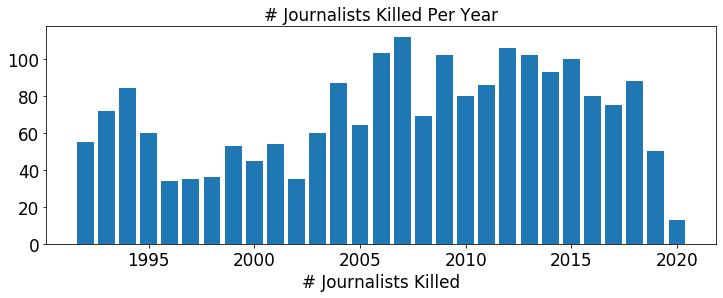

In [39]:
#cpj_GB_year_count = cpj.groupby('year').count().reset_index().loc[:,['year','combinedStatus']]
#cpj_GB_year_count.rename(columns={'combinedStatus':'Count'},inplace=True)
cpj_GB_year_count = category_count_df_one_column(cpj,'year')
cpj_GB_year_count.head()

fig, ax = plt.subplots(1,figsize=(12,4))
ax.bar(cpj_GB_year_count['year'],cpj_GB_year_count['Count'])
ax.set_xlabel('Year')
ax.set_xlabel('# Journalists Killed')
ax.set_title('# Journalists Killed Per Year')

plt.savefig('../images/TotalDeathsVsYear.png',bbox_inches='tight')

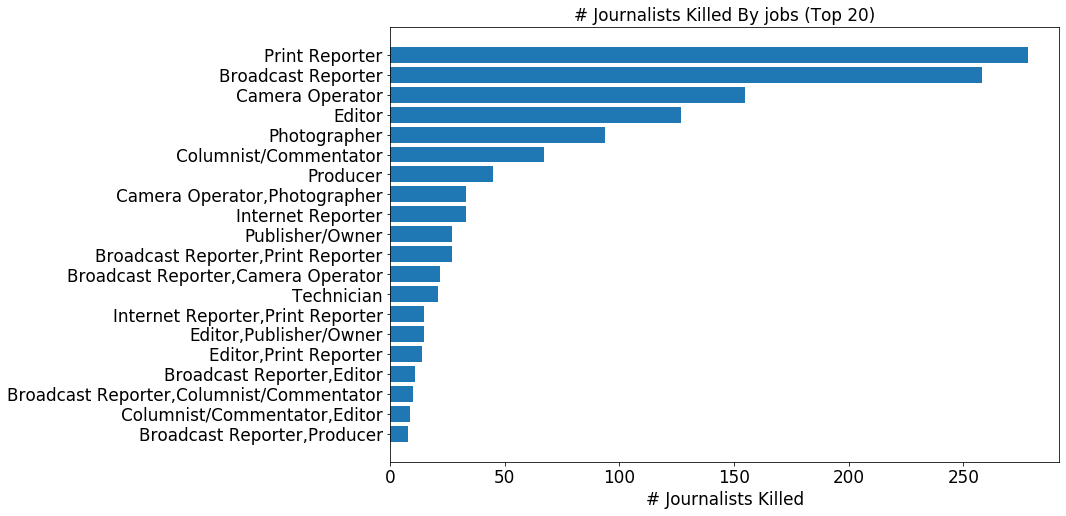

In [40]:
plot_hbar_category_count(cpj, 'jobs', 20)

#plt.savefig('../images/TotalDeathsVsYear.png',bbox_inches='tight')

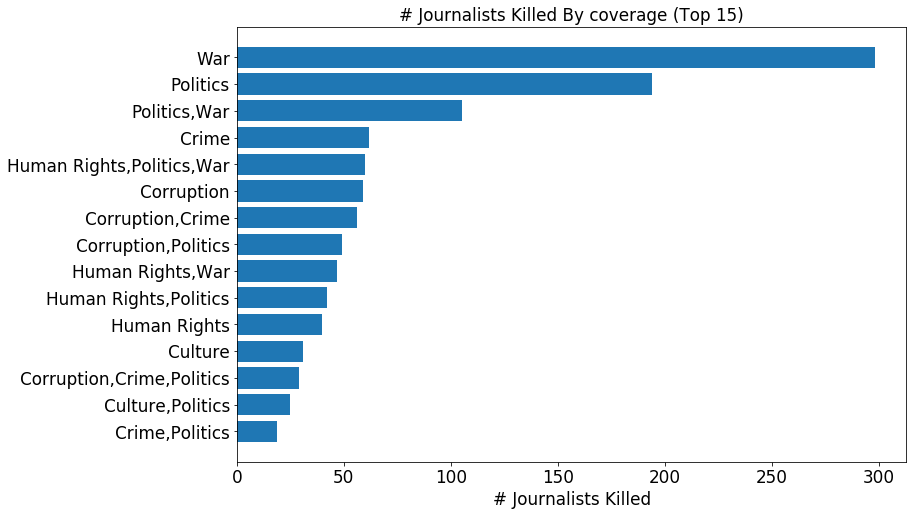

In [41]:
#cpj_GB_year_count = category_count_df_one_column(cpj,'coverage')
#cpj_GB_year_count.head()

#cpj_GB_year_count = cpj_GB_year_count.iloc[0:20,:]

#fig, ax = plt.subplots(1,figsize=(12,8))
#ax.barh(cpj_GB_year_count['coverage'],cpj_GB_year_count['Count'])
#ax.set_xlabel('Year')
#ax.set_xlabel('# Journalists Killed')
#ax.set_title('# Journalists Killed By Coverage')
#ax.invert_yaxis()
#plt.savefig('../images/TotalDeathsVsYear.png',bbox_inches='tight')

plot_hbar_category_count(cpj, 'coverage', 15)

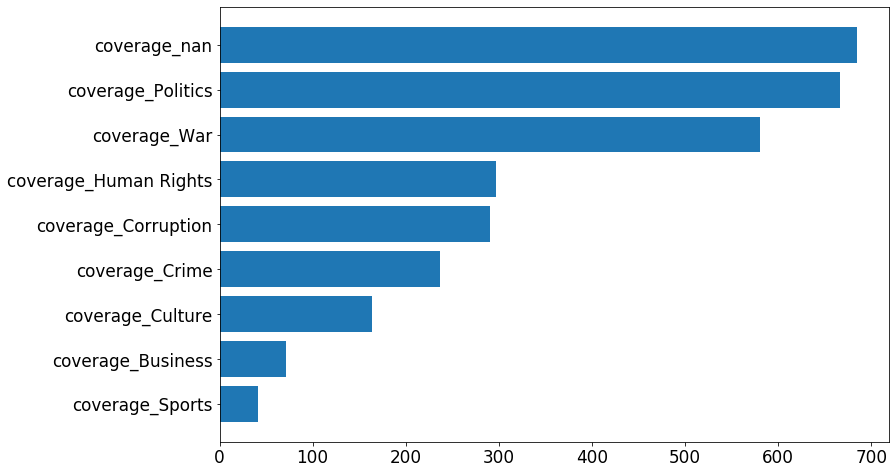

In [143]:
df = cpj.copy()
df=add_category_counts_to_df(df,'coverage')
df=df.filter(regex='^coverage', axis=1).sum().to_frame(name='Count').reset_index().rename(columns={'index':'coverage'}).sort_values('Count',ascending=False)
df

fig,ax = plt.subplots(1, figsize=(12,8))
ax.barh(df['coverage'],df['Count'])
ax.invert_yaxis()


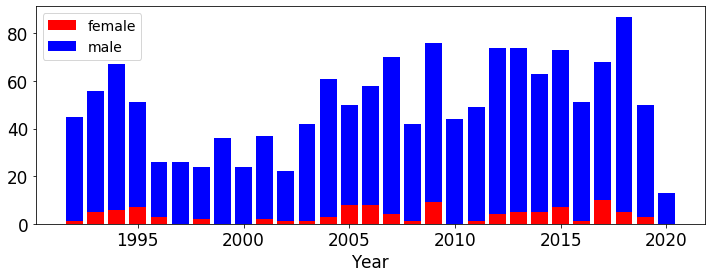

In [42]:
cpj_GB_yeargender_count = cpj.groupby(['year','gender']).count().unstack(fill_value=0).stack().reset_index().loc[:,['year','gender','combinedStatus']]

#
#cpj_GB_yeargender_count=cpj_GB_yeargender_count[cpj_GB_yeargender_count['year']<2020]
cpj_GB_yeargender_count.rename(columns={'combinedStatus':'Count'},inplace=True)
cpj_GB_yeargender_count

fig, ax = plt.subplots(1,figsize=(12,4))
ax.bar(cpj_GB_yeargender_count[cpj_GB_yeargender_count['gender']=='Female']['year'],cpj_GB_yeargender_count[cpj_GB_yeargender_count['gender']=='Female']['Count'],color='red',label='female')
ax.bar(cpj_GB_yeargender_count[cpj_GB_yeargender_count['gender']=='Male']['year'],cpj_GB_yeargender_count[cpj_GB_yeargender_count['gender']=='Male']['Count'],color='blue', label='male',bottom=cpj_GB_yeargender_count[cpj_GB_yeargender_count['gender']=='Female']['Count'])
ax.set_xlabel('Year')
ax.legend()

#ax.set_ylabel('# Journalists Killed')
#ax.set_title('# Journalists Killed Per Year')

#plt.savefig('../images/TotalDeathsVsYear.png',bbox_inches='tight')

In [43]:
#cpj_GB_country_count = cpj.groupby('country').count().reset_index().loc[:,['country','year']].sort_values('year',ascending=False).head(20)
#cpj_GB_country_count.rename(columns={'year':'Count'},inplace=True)


#print(cpj_GB_country_count.head(20))
#print(df2.head(20))

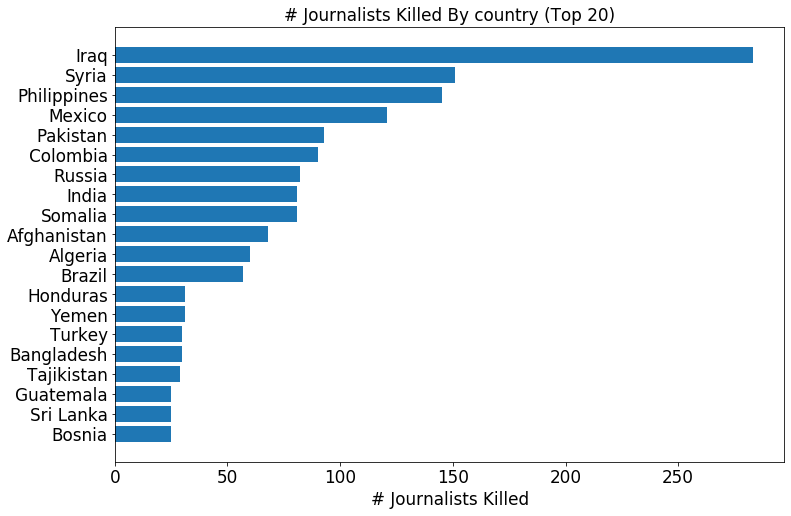

In [44]:
#cpj_GB_country_count = category_count_df_one_column(cpj,'country',20)

#fig, ax = plt.subplots(1,figsize=(12,8))
#ax.barh(cpj_GB_country_count['country'],cpj_GB_country_count['Count'])
#ax.set_xlabel('# Journalists Killed')
#ax.set_title('# Journalists Killed Per Country (Top 20)')
#ax.invert_yaxis()

plot_hbar_category_count(cpj, 'country', 20)

plt.savefig('../images/TotalDeathsByCountry.png',bbox_inches='tight')

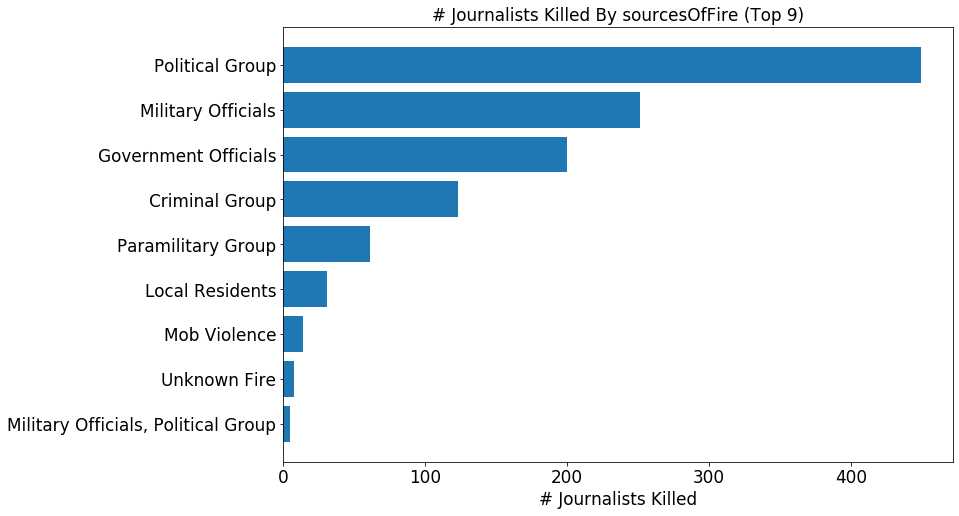

In [45]:
#cpj_GB_sof_count = category_count_df_one_column(cpj,'sourcesOfFire')
#cpj_GB_sof_count =cpj_GB_sof_count.iloc[0:9,:]

#fig, ax = plt.subplots(1,figsize=(12,8))
#ax.barh(cpj_GB_sof_count['sourcesOfFire'],cpj_GB_sof_count['Count'])
#ax.set_xlabel('# Journalists Killed')
#ax.set_title('# Journalists Killed By Source of Fire')
#ax.invert_yaxis()

plot_hbar_category_count(cpj, 'sourcesOfFire', 9)

#plt.savefig('../images/TotalDeathsByCountry.png',bbox_inches='tight')

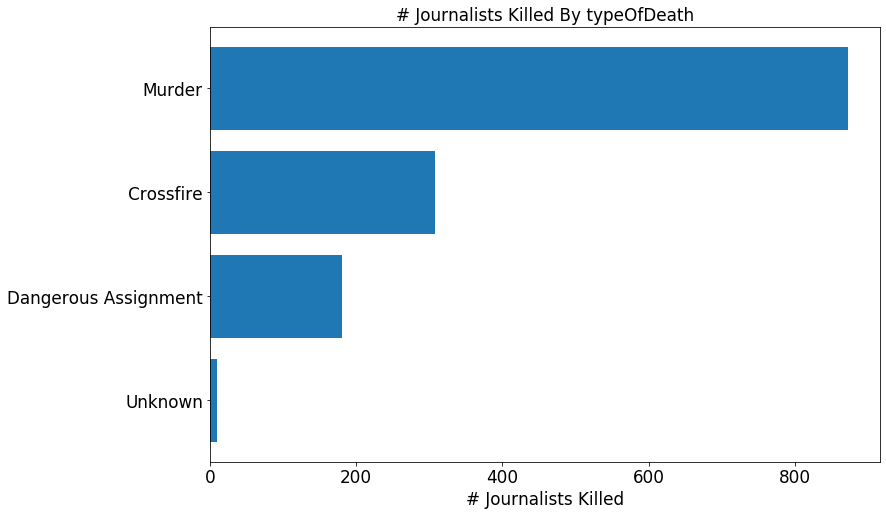

In [46]:
plot_hbar_category_count(cpj, 'typeOfDeath', dropna=False)